Самостоятельно напишите нейронную сеть, которая может стать составной частью системы бота для игры в "Крестики-нолики". Используя подготовленную базу изображений, создайте и обучите нейронную сеть, распознающую две категории изображений: крестики и нолики. Добейтесь точности распознавания более 95% (accuracy)

In [ ]:
# Подключение класса для создания нейронной сети прямого распространенияФЫ
from tensorflow.keras.models import Sequential
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam
# Подключение утилит для to_categorical
from tensorflow.keras import utils
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение модуля для работы с файлами
import os
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt
from PIL import Image
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

In [ ]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_pro.zip', None, quiet=True)

'hw_pro.zip'

In [ ]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_pro.

# Путь к директории с базой
base_dir = 'hw_pro'

unzip:  cannot find or open hw_pro., hw_pro..zip or hw_pro..ZIP.


In [ ]:
# Путь к директории с базой
base_dir = '/content/hw_pro'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train.shape)
print('Размер массива y_train', y_train.shape)

Размер массива x_train (102, 20, 20, 1)
Размер массива y_train (102,)


In [ ]:
# Нормализация данных (приведение значений пикселей к диапазону [0, 1])
x_train = x_train / 255.0

In [ ]:
# Преобразование данных в одномерный вектор
x_train = x_train.reshape(x_train.shape[0], -1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5909 - loss: 0.7131 - val_accuracy: 0.0000e+00 - val_loss: 1.3065
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5948 - loss: 0.6792 - val_accuracy: 0.0476 - val_loss: 0.8157
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7297 - loss: 0.5689 - val_accuracy: 0.0000e+00 - val_loss: 1.0504
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6839 - loss: 0.6082 - val_accuracy: 0.0000e+00 - val_loss: 1.0485
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7779 - loss: 0.5311 - val_accuracy: 0.0476 - val_loss: 0.8318
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7610 - loss: 0.4936 - val_accuracy: 0.1429 - val_loss: 0.8274
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7902 - loss: 0.5164 - val_accuracy: 0.7143 - val_loss: 0.6441
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8641 - loss: 0.4209 - val_accuracy: 0.3333 - val_loss: 0.8434
E

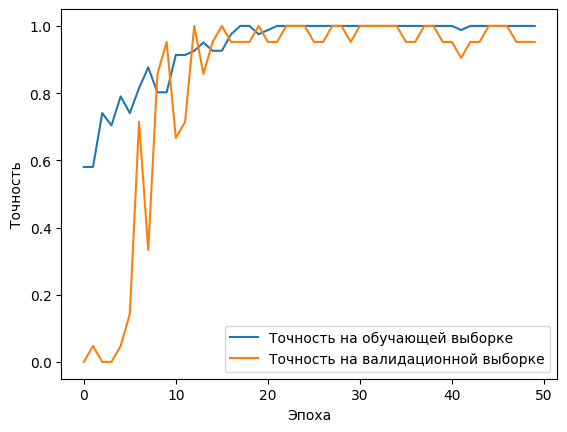

In [ ]:
# Создание модели нейронной сети
model = Sequential()
model.add(Dense(400, input_dim=400, activation='relu'))
model.add(Dropout(0.2))  # Добавляем Dropout для предотвращения переобучения
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Вывод точности на последней эпохе
print(f"Финальная точность: {history.history['accuracy'][-1]}")

# Сохранение весов модели
model.save_weights("dz_pro.weights.h5")

# Визуализация процесса обучения
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()